In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from tqdm import tqdm_notebook

In [1]:
def eval_path(path, dist_mat):
    return dist_mat[path[:-1], path[1:]].sum()

def draw_path(path, points, cost):
    fig, ax = plt.subplots(figsize=[12, 10])
    x_ax = []
    y_ax = []
    for i in range(len(path)-1):
        curr_p = points[path[i]]
        next_p = points[path[i+1]]
        x_ax += [curr_p[0], next_p[0]]
        y_ax += [curr_p[1], curr_p[1]]
    x_ax += [next_p[0]]
    y_ax += [next_p[1]]
    ax.plot(x_ax, y_ax, label=f'Path length = {cost}', alpha=0.8)
    ax.scatter(points[path][:, 0], points[path][:, 1], c='r')
    ax.legend()
    ax.grid()
    
def MonteCarloSearch(dist_mat, sample_size):
    n = dist_mat.shape[0]
    best_path = None
    best_cost = np.Inf
    for i in tqdm_notebook(range(sample_size)):
        path = np.random.permutation(n)
        cost = eval_path(path, dist_mat)
        if cost < best_cost:
            best_cost = cost
            best_path = path
    return best_path, best_cost

def RandomWalk(dist_mat, n_iter=1000000):
    n = dist_mat.shape[0]
    current_path = np.random.permutation(n)
    best_cost = eval_path(current_path, dist_mat)
    best_path = np.copy(current_path)
    
    for i in tqdm_notebook(range(n_iter)):
        swap = np.random.choice(n, size=2, replace=False)
        current_path[swap] = current_path[swap[::-1]]
        cost = eval_path(current_path, dist_mat)
        if cost < best_cost:
            best_cost = cost
            best_path = np.copy(current_path)
    
    return best_path, best_cost

def HillClimbing(dist_mat, n_runs=100):
    n = dist_mat.shape[0]
    best_path = None
    best_cost = np.Inf
    
    for _ in tqdm_notebook(range(n_runs)):
        current_path = np.random.permutation(n)
        cost = eval_path(current_path, dist_mat)
        
        changed = True
        while changed:
            changed = False
            costs = []
            for i in range(n-1):    
                neighbor = np.copy(current_path)
                neighbor[i], neighbor[i+1] = neighbor[i+1], neighbor[i]
                costs.append(eval_path(neighbor, dist_mat))
            minind = np.argmin(costs)
            if costs[minind] < cost:
                current_path[minind], current_path[minind+1] = \
                current_path[minind+1], current_path[minind]
                
                cost = costs[minind]
                changed = True
                
        if cost < best_cost:
            best_path = np.copy(current_path)
            best_cost = cost
                    
    return best_path, best_cost
    
def SimulatedAnnealing(dist_mat, n_iter):
    
    def transit(e1, e2, T):
        if e2 < e1:
            return 1
        else:
            return np.exp(-(e2 - e1)/T)
        
    n = dist_mat.shape[0]
    current_path = np.random.permutation(n)
    curr_cost = eval_path(current_path, dist_mat)
    
    for i in tqdm_notebook(range(n_iter)):
        T = n_iter/(i+1)
        
        neighbor = np.copy(current_path)
        swap = np.random.choice(n, size=2, replace=False)
        neighbor[swap] = neighbor[swap[::-1]]
        
        n_cost = eval_path(neighbor, dist_mat)
        p_transit = transit(curr_cost, n_cost, T)
        if np.random.rand() <= p_transit:
            current_path = neighbor
            curr_cost = n_cost
    
    return current_path, curr_cost

In [4]:
cities = pd.read_csv('Data/tsp.csv', header=None, index_col=0).values
dmat = distance_matrix(cities, cities, p=1)

### Monte Carlo search:

In [75]:
bp_mc, cost_mc = MonteCarloSearch(dmat, int(10e5))

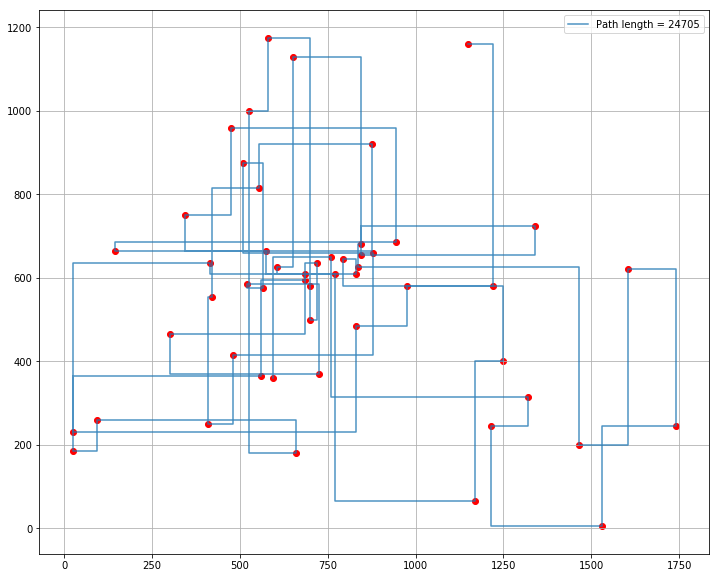

In [76]:
draw_path(bp_mc, cities, cost_mc)

### Random Walk search:

In [77]:
bp_rw, cost_rw = RandomWalk(dmat, int(10e5))

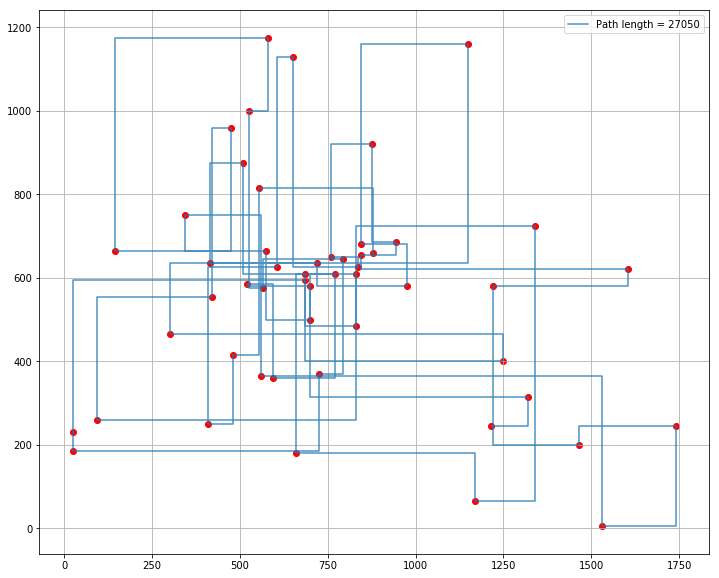

In [78]:
draw_path(bp_rw, cities, cost_rw)

### Hill Climbing:

In [31]:
bp_hc, cost_hc = HillClimbing(dmat, 1000)

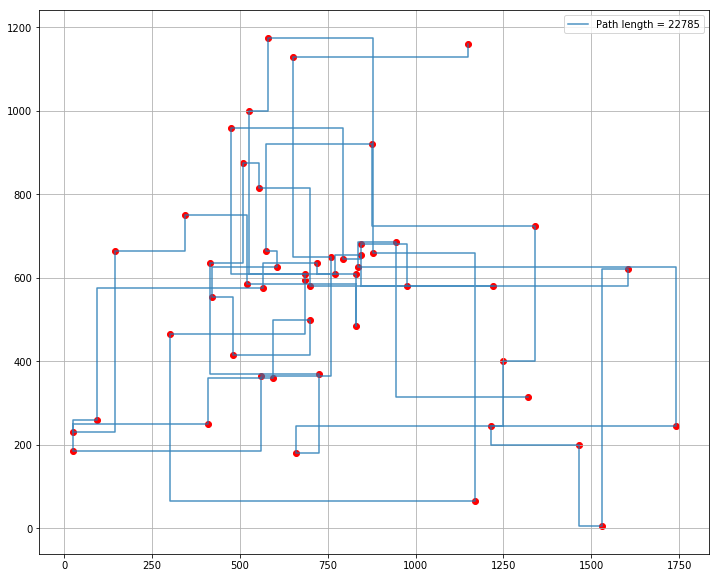

In [32]:
draw_path(bp_hc, cities, cost_hc)

### Simulated annealing:

In [102]:
bp_sa, cost_sa = SimulatedAnnealing(dmat, int(10e5))

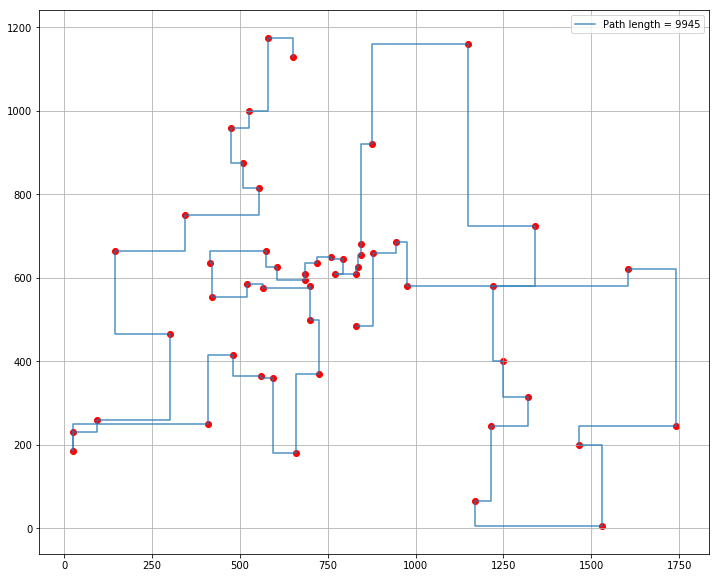

In [103]:
draw_path(bp_sa, cities, cost_sa)